### Creating a class for the project

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [139]:
class mnist_nn:
  def __init__(self):
    ''' The init function would read the dataset from sklearn datasets and print its shape'''
    from keras.datasets import mnist
    (self.x_train,self.y_train),(self.x_test,self.y_test)=mnist.load_data()
    print('Size of Train data : ',self.x_train.shape)
    print('Size of Test data : ',self.x_test.shape)
    self.combine_x=[self.x_train,self.x_test]
    self.combine_y=[self.y_train,self.y_test]
  

  def ohe_outputs(self):
    ''' The function would one hot encode the outputs of the mnist dataset '''
    import numpy as np
    self.combine_ohe=[]
    for data_y in self.combine_y:
      result=np.zeros((data_y.shape[0],10))
      for i in range(data_y.shape[0]):
        result[i][data_y[i]]=1
      self.combine_ohe.append(np.array(result))
    self.combine_ohe=np.array(self.combine_ohe)

  def image_normalisation(self):
    ''' Dividing all pixel images by 255 to normalise it '''
    self.combine_x[0]=self.combine_x[0]/255
    self.combine_x[1]=self.combine_x[1]/255

  def create_best_model(self,epochs=10):
    ''' Creating the best model with all the data to get the best
    fit model so as to label the data produced by GAN'''
    import keras
    from keras import Sequential
    from keras.layers import Flatten,Dense

    model=keras.Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(512,activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(self.combine_x[0],self.combine_ohe[0],validation_data=(self.combine_x[1],self.combine_ohe[1]),epochs=epochs,verbose=1)
    self.model=model


  def convert_to_n_class(self):
    ''' Converts the MNIST into a 2 class classification problem by 5 and not 5'''
    # Step 1 : Combine the data
    import numpy as np
    self.combine_x=np.concatenate([self.combine_x[0],self.combine_x[1]])
    self.combine_y=np.concatenate([self.combine_y[0],self.combine_y[1]])
    # Check for the number of 5's and not 5's 
    print('The number of images with class "5" : ', self.combine_y[np.where(self.combine_y==5)].shape)
    print('The number of images with class "NOT 5" : ',self.combine_y[np.where(self.combine_y!=5)].shape)
    # Dropping 95% of the data
    #Randomly selecting 5% of the index
    fivePct=(self.combine_y[np.where(self.combine_y==5)].shape[0]*5)//100
    index=np.arange(0,self.combine_y[np.where(self.combine_y==5)].shape[0])
    import random
    five_pct_index=random.sample(set(index),fivePct)

    # Step 2: Creating a subset by dropping 5% of the class "5" whie keeping all elements
    #thus creating an imbalance
    print('\nRandom sampling to select 5% of the data from class 5 keeping the rest \n')
    x_subset_of_5_class=self.combine_x[np.where(self.combine_y==5)][five_pct_index]
    y_subset_of_5_class=self.combine_y[np.where(self.combine_y==5)][five_pct_index]
    x_subset_of_not_5_class=self.combine_x[np.where(self.combine_y!=5)]
    y_subset_of_not_5_class=self.combine_y[np.where(self.combine_y!=5)]

    self.subset_x=np.concatenate([x_subset_of_5_class,x_subset_of_not_5_class])
    self.subset_y=np.concatenate([y_subset_of_5_class,y_subset_of_not_5_class])

    print('The number of images with class "5" : ', mnist.subset_y[np.where(mnist.subset_y==5)].shape)
    print('The number of images with class "NOT 5" : ',mnist.subset_y[np.where(mnist.subset_y!=5)].shape)

    print('Shuffling the data to make sure that there is no specific patterns')
    # Creating an index and shuffling it 
    index=np.arange(0,self.subset_y.shape[0])
    random.shuffle(index)
    self.subset_x=self.subset_x[index]
    self.subset_y=self.subset_y[index]

    # Printing the data to verify that we havent lost any data during the process
    # print('The number of images with class "5" : ', mnist.subset_y[np.where(mnist.subset_y==5)].shape)
    # print('The number of images with class "NOT 5" : ',mnist.subset_y[np.where(mnist.subset_y!=5)].shape)


  def model_with_unbalanced_data(self,epochs=10):
    ''' Creating a model with the unbalanced dataset to see the performance '''
    import keras
    from keras import Sequential
    from keras.layers import Flatten,Dense

    model=keras.Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(512,activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(self.combine_x[0],self.combine_ohe[0],validation_data=(self.subset_x,self.subset_y),epochs=epochs,verbose=1)
    self.unbalanced_model=model

  def print_data(self,data,labels,number=4):
    ''' Fcuntion to print the data alomg with the labels for testing purposes'''
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,10))
    plot_count=1
    for i in range(number):
      plt.subplot(1,number,plot_count)
      plt.title(str(labels[i]))
      plt.imshow(data[i].reshape(28,28))
      plot_count+=1



Size of Train data :  (60000, 28, 28)
Size of Test data :  (10000, 28, 28)
The number of images with class "5" :  (6313,)
The number of images with class "NOT 5" :  (63687,)

Random sampling to select 5% of the data from class 5 keeping the rest 

The number of images with class "5" :  (315,)
The number of images with class "NOT 5" :  (63687,)
Shuffling the data to make sure that there is no specific patterns


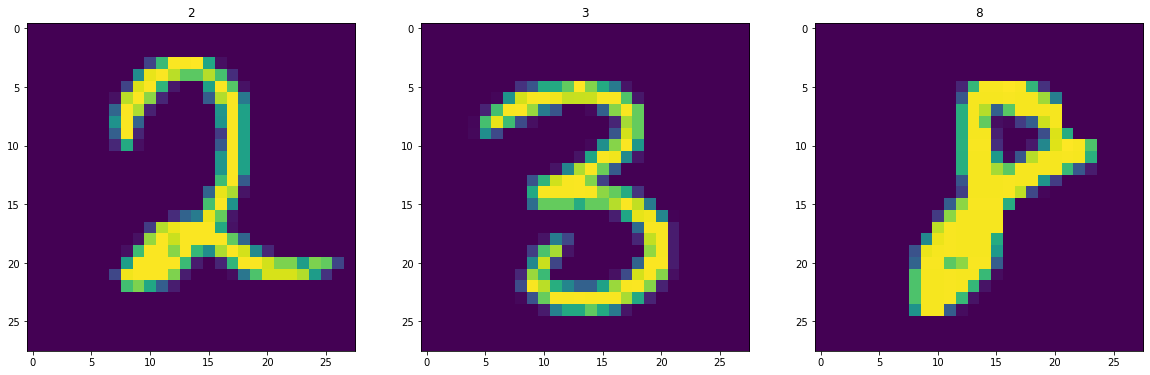

In [140]:
mnist=mnist_nn()
# Operations on image
mnist.ohe_outputs() # One Hot Encoding the Y values
mnist.image_normalisation() # Normalising the pixels in image
# mnist.create_best_model(20) # Creating the best model from the available data which will later be used for labelling the images produced by the GAN
mnist.convert_to_n_class()
mnist.print_data(mnist.subset_x,mnist.subset_y,3)


In [142]:
mnist.model_with_unbalanced_data()

ValueError: ignored

In [116]:
l=np.array([l,l,l,l]
random.shuffle(l)
l

array([4, 3, 1, 2, 6, 5])

In [131]:
l=np.array([1,2,3,4,5])
l[[4,3,2,1]]

array([5, 4, 3, 2])

5


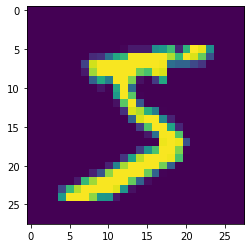

In [78]:
aimport matplotlib.pyplot as plt
plt.imshow(mnist.combine_x[0])
print(mnist.combine_y[0])

In [56]:
import numpy as np
fivePct=(mnist.combine_y[np.where(mnist.combine_y==5)].shape[0]*5)//100
index=np.arange(0,mnist.combine_y[np.where(mnist.combine_y==5)].shape[0])
import random
print(fivePct)
# random.sample(index,fivePct)
# print(len(index),index[0],index[:-1],random.sample(index,fivePct).shape)

315


In [62]:
random.sample(set(index),10)


[617, 3455, 4264, 5035, 261, 1563, 3752, 2838, 3294, 2598]

In [61]:
set(index)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
